## EDA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pathlib
import random
from collections import Counter

## Style Transfer Cubism Data

In [3]:
image_dir = pathlib.Path(r"C:\Users\anush\Downloads\Cubism")

image_paths = list(image_dir.glob('*'))  

# Create tf.data.Dataset from image file paths
dataset = tf.data.Dataset.from_tensor_slices([str(path) for path in image_paths])

def load_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3)  
    return image

image_dataset = dataset.map(load_image)

In [3]:
image_dataset.cardinality().numpy()

np.int64(2235)

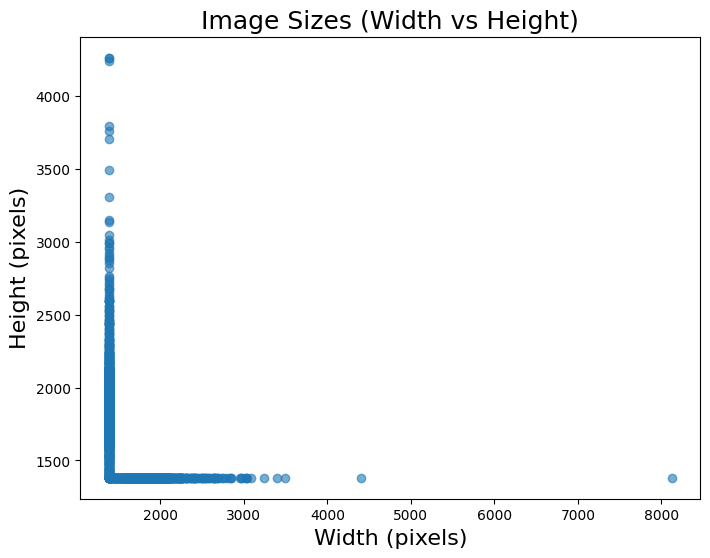

In [6]:
# Function to get image sizes
def get_image_size(image):
    shape = tf.shape(image)
    height = shape[0].numpy()
    width = shape[1].numpy()
    return width, height

widths = []
heights = []

for image in image_dataset:
    w, h = get_image_size(image)
    widths.append(w)
    heights.append(h)

plt.figure(figsize=(8,6))
plt.scatter(widths, heights, alpha=0.6)
plt.title('Image Sizes (Width vs Height)', fontsize=18)
plt.xlabel('Width (pixels)', fontsize=16)
plt.ylabel('Height (pixels)', fontsize=16)
plt.show()

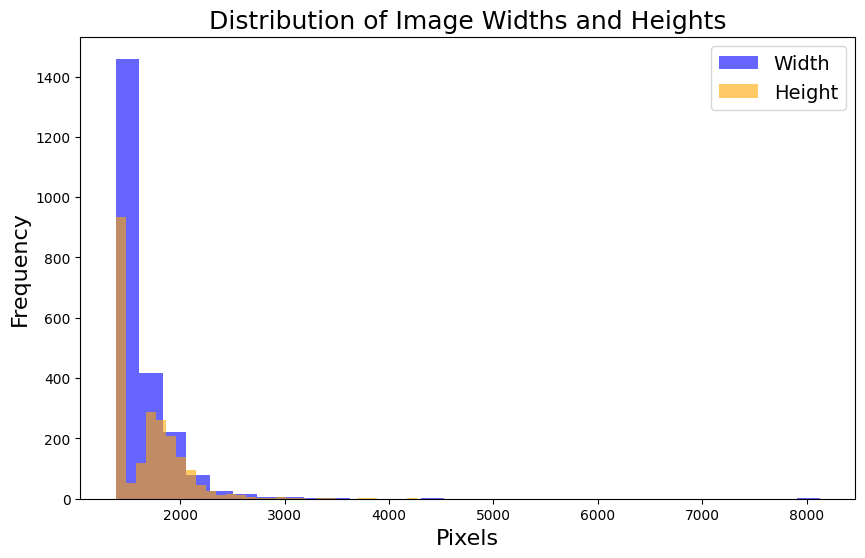

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(widths, bins=30, alpha=0.6, label='Width', color='blue')
plt.hist(heights, bins=30, alpha=0.6, label='Height', color='orange')
plt.title('Distribution of Image Widths and Heights', fontsize=18)
plt.xlabel('Pixels', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [5]:
image_folder = r"C:\Users\anush\Downloads\Cubism"
image_paths = tf.data.Dataset.list_files(image_folder + "/*")

target_size = (224, 224)

def load_and_resize_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_image(image, channels=3, expand_animations=False)
    image = tf.image.resize(image, target_size)
    image = tf.cast(image, tf.uint8)
    return image

resized_dataset = image_paths.map(load_and_resize_image)

batch_size = 32
batched_dataset = resized_dataset.batch(batch_size)

hist_red = np.zeros(256)
hist_green = np.zeros(256)
hist_blue = np.zeros(256)

for batch in batched_dataset:
    batch_np = batch.numpy()
    hist_red += np.histogram(batch_np[:, :, :, 0].flatten(), bins=256, range=(0,255))[0]
    hist_green += np.histogram(batch_np[:, :, :, 1].flatten(), bins=256, range=(0,255))[0]
    hist_blue += np.histogram(batch_np[:, :, :, 2].flatten(), bins=256, range=(0,255))[0]

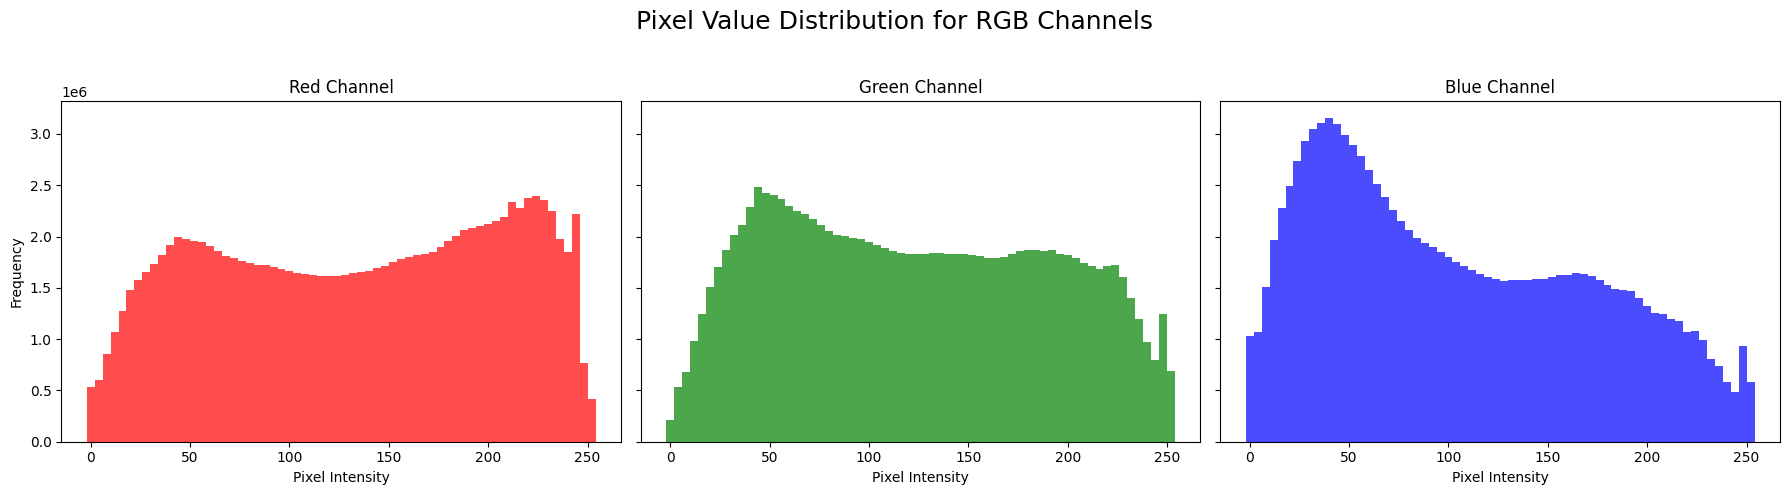

In [6]:
def rebin_hist(hist, factor=4):
    # Sum over groups of `factor` bins
    return hist.reshape(-1, factor).sum(axis=1)

bins_rebin = np.arange(0, 256, 4)  # 64 bins
hist_red_rebin = rebin_hist(hist_red)
hist_green_rebin = rebin_hist(hist_green)
hist_blue_rebin = rebin_hist(hist_blue)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

axes[0].bar(bins_rebin, hist_red_rebin, color='red', alpha=0.7, width=4)
axes[0].set_title('Red Channel')
axes[0].set_xlabel('Pixel Intensity')
axes[0].set_ylabel('Frequency')

axes[1].bar(bins_rebin, hist_green_rebin, color='green', alpha=0.7, width=4)
axes[1].set_title('Green Channel')
axes[1].set_xlabel('Pixel Intensity')

axes[2].bar(bins_rebin, hist_blue_rebin, color='blue', alpha=0.7, width=4)
axes[2].set_title('Blue Channel')
axes[2].set_xlabel('Pixel Intensity')

plt.suptitle('Pixel Value Distribution for RGB Channels', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


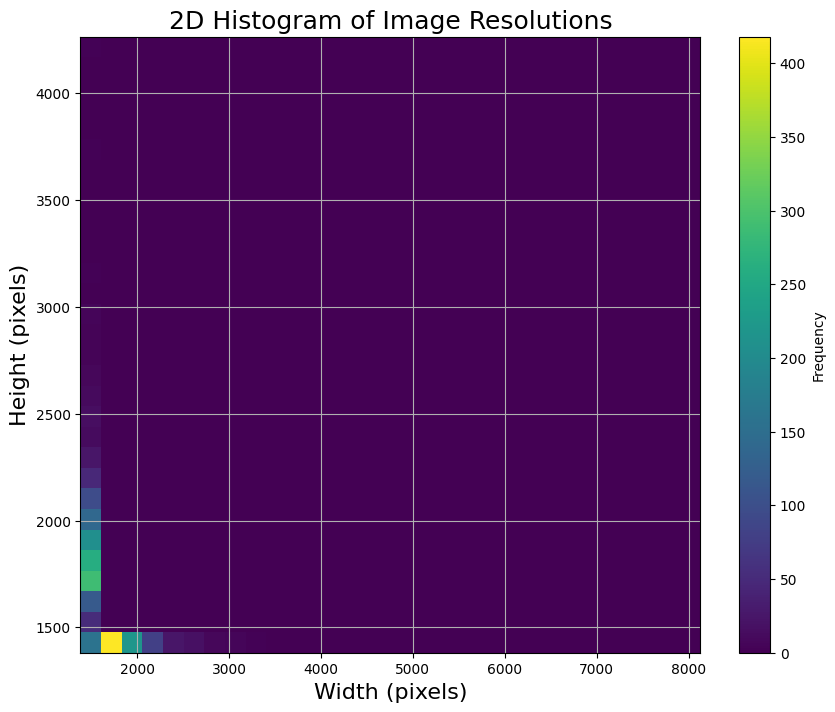

In [ ]:
# Extract width and height lists
widths = [res[0] for res in resolutions]
heights = [res[1] for res in resolutions]

plt.figure(figsize=(10, 8))
plt.hist2d(widths, heights, bins=(30, 30), cmap='viridis')
plt.colorbar(label='Frequency')
plt.title('2D Histogram of Image Resolutions', fontsize=18)
plt.xlabel('Width (pixels)', fontsize=16)
plt.ylabel('Height (pixels)', fontsize=16)
plt.grid(True)
plt.show()

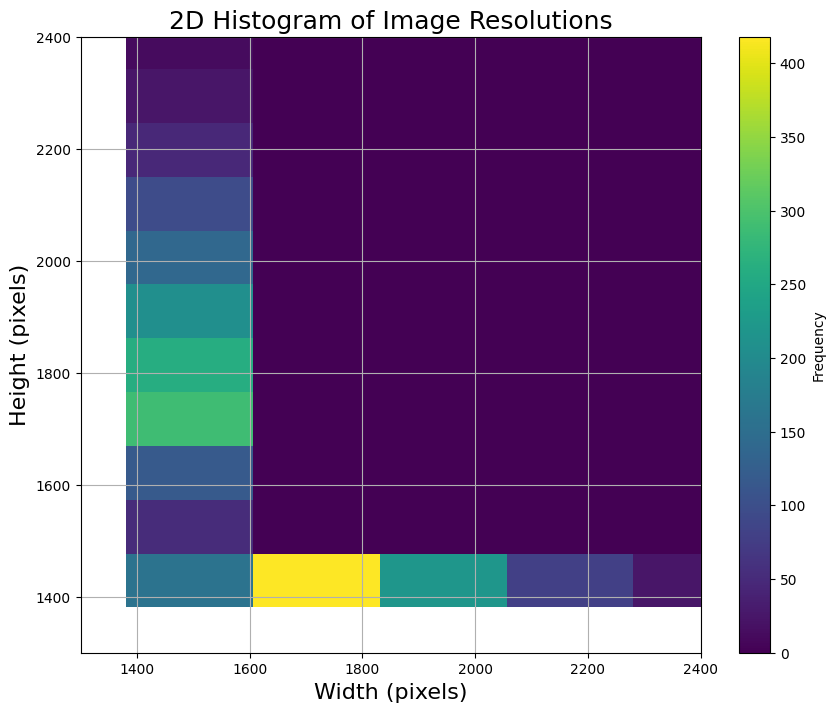

In [13]:
plt.figure(figsize=(10, 8))
plt.hist2d(widths, heights, bins=(30, 30), cmap='viridis')
plt.colorbar(label='Frequency')
plt.title('2D Histogram of Image Resolutions', fontsize=18)
plt.xlabel('Width (pixels)', fontsize=16)
plt.ylabel('Height (pixels)', fontsize=16)
plt.xlim(1300, 2400)   # Limit x-axis (width) to 0–500
plt.ylim(1300, 2400)   # Limit y-axis (height) to 0–500
plt.grid(True)
plt.show()

## Fake Art Data

In [17]:
# Define path to training directory
image_dir = pathlib.Path(r"C:\Users\anush\Downloads\archive\ai_art_classification\train")

# Recursively collect all image file paths from subdirectories
image_paths = list(image_dir.glob('*/*'))  # This searches all files in subfolders

# Create a tf.data.Dataset from image paths
dataset = tf.data.Dataset.from_tensor_slices([str(path) for path in image_paths])

# Function to load and decode image
def load_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3)
    image.set_shape([None, None, 3])  # Ensures the shape is known for downstream ops
    return image

# Map the image loading function onto the dataset
image_dataset = dataset.map(load_image)


In [18]:
image_dataset.cardinality().numpy()

np.int64(18618)

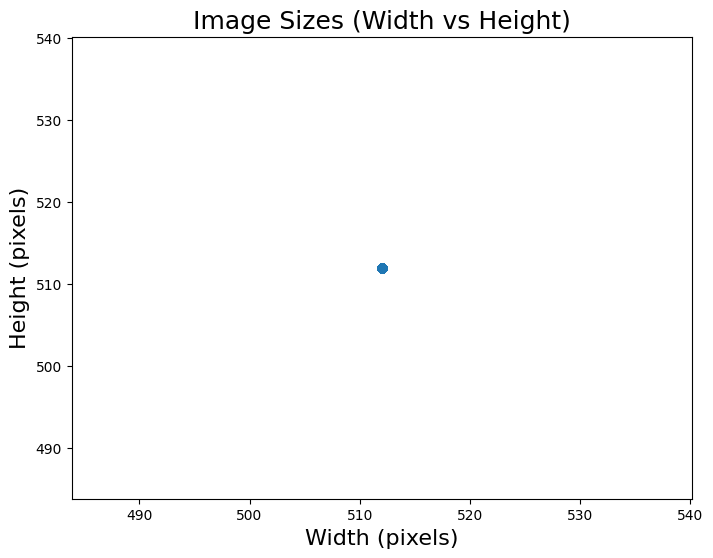

In [19]:
# Function to get image sizes
def get_image_size(image):
    shape = tf.shape(image)
    height = shape[0].numpy()
    width = shape[1].numpy()
    return width, height

widths = []
heights = []

for image in image_dataset:
    w, h = get_image_size(image)
    widths.append(w)
    heights.append(h)

plt.figure(figsize=(8,6))
plt.scatter(widths, heights, alpha=0.6)
plt.title('Image Sizes (Width vs Height)', fontsize=18)
plt.xlabel('Width (pixels)', fontsize=16)
plt.ylabel('Height (pixels)', fontsize=16)
plt.show()

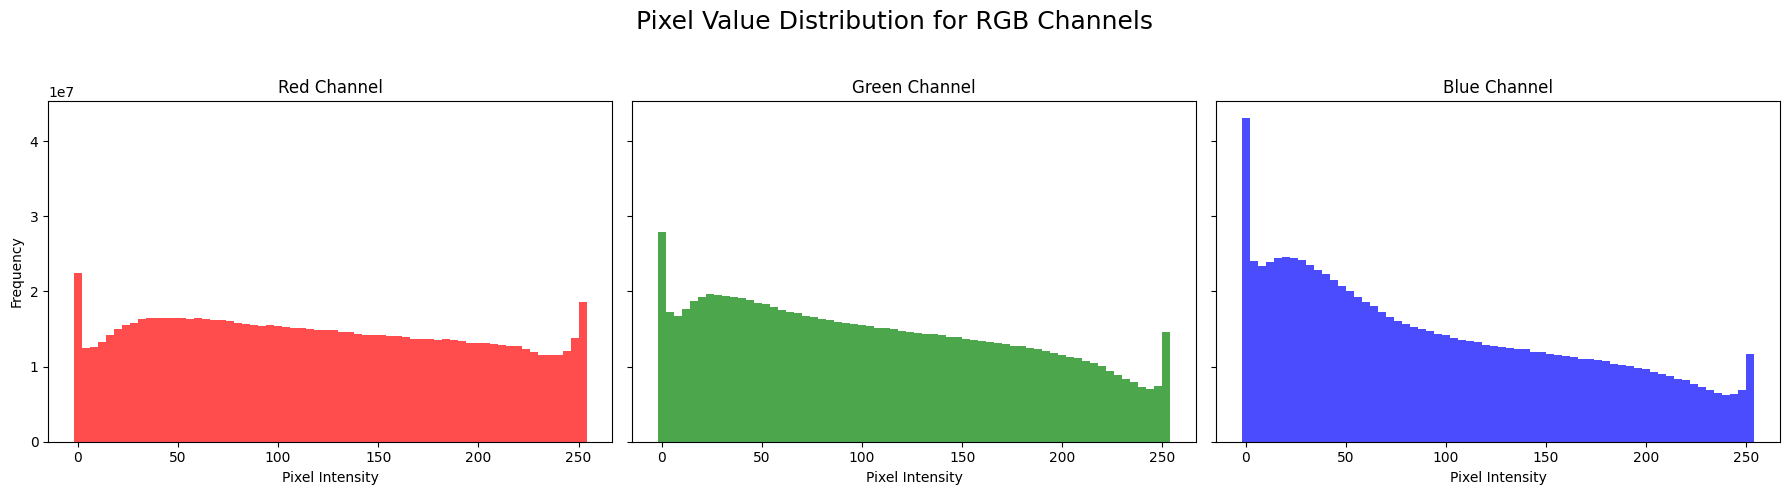

In [20]:
image_dir = pathlib.Path(r"C:\Users\anush\Downloads\archive\ai_art_classification\train")
image_paths = list(image_dir.glob('*/*'))
dataset = tf.data.Dataset.from_tensor_slices([str(path) for path in image_paths])

target_size = (224, 224)

def load_and_resize_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_image(image, channels=3, expand_animations=False)
    image = tf.image.resize(image, target_size)
    image = tf.cast(image, tf.uint8)
    return image

resized_dataset = dataset.map(load_and_resize_image, num_parallel_calls=tf.data.AUTOTUNE)
batch_size = 32
batched_dataset = resized_dataset.batch(batch_size)

hist_red = np.zeros(256)
hist_green = np.zeros(256)
hist_blue = np.zeros(256)

for batch in batched_dataset:
    batch_np = batch.numpy()
    hist_red += np.histogram(batch_np[:, :, :, 0].flatten(), bins=256, range=(0, 255))[0]
    hist_green += np.histogram(batch_np[:, :, :, 1].flatten(), bins=256, range=(0, 255))[0]
    hist_blue += np.histogram(batch_np[:, :, :, 2].flatten(), bins=256, range=(0, 255))[0]

def rebin_hist(hist, factor=4):
    return hist.reshape(-1, factor).sum(axis=1)

bins_rebin = np.arange(0, 256, 4)
hist_red_rebin = rebin_hist(hist_red)
hist_green_rebin = rebin_hist(hist_green)
hist_blue_rebin = rebin_hist(hist_blue)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
axes[0].bar(bins_rebin, hist_red_rebin, color='red', alpha=0.7, width=4)
axes[0].set_title('Red Channel')
axes[0].set_xlabel('Pixel Intensity')
axes[0].set_ylabel('Frequency')
axes[1].bar(bins_rebin, hist_green_rebin, color='green', alpha=0.7, width=4)
axes[1].set_title('Green Channel')
axes[1].set_xlabel('Pixel Intensity')
axes[2].bar(bins_rebin, hist_blue_rebin, color='blue', alpha=0.7, width=4)
axes[2].set_title('Blue Channel')
axes[2].set_xlabel('Pixel Intensity')
plt.suptitle('Pixel Value Distribution for RGB Channels', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()